<h1><center>CSEN1022:Assignment 3</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Youssef Abdelrahman Ahmed

GUC-ID: 40-17245

Elective Tutorial No.: 8

**Member 2**

Name: Ramez Mohamed Elmasry

GUC-ID: 43-10324

Elective Tutorial No.: 8

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [34]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data

In [35]:
# X_train, X_test
# THE image categories are different.
train_airplane = np.array(
    [plt.imread('Data/train/airplane/' + str(i) + '.jpg').astype("int64").reshape(-1) for i in range(0, 5000)])
test_airplane = np.array([plt.imread('Data/test/airplane/' + str(i) + '.jpg').astype("int64").reshape(-1) for i in range(0, 1000)])
train_bird = np.array(
    [plt.imread('Data/train/bird/' + str(i) + '.jpg').astype("int64").reshape(-1) for i in range(0, 5000)])
test_bird = np.array(
    [plt.imread('Data/test/bird/' + str(i) + '.jpg').astype("int64").reshape(-1) for i in range(0, 1000)])
train_truck = np.array([plt.imread('Data/train/truck/' + str(i) + '.jpg').astype("int64").reshape(-1) for i in range(0, 5000)])
test_truck = np.array([plt.imread('Data/test/truck/' + str(i) + '.jpg').astype("int64").reshape(-1) for i in range(0, 1000)])

# train_airplane_normalized = train_airplane / 255
# train_bird_normalized = train_bird / 255
# train_truck_normalized = train_truck / 255
# test_airplane_normalized = test_airplane / 255
# test_bird_normalized = test_bird / 255
# test_truck_normalized = test_truck / 255
# test = np.concatenate((test_airplane_normalized,test_bird_normalized,test_truck_normalized))
# train = np.concatenate((train_airplane_normalized, train_bird_normalized,train_truck_normalized))
test = np.concatenate((test_airplane,test_bird,test_truck))
train = np.concatenate((train_airplane, train_bird,train_truck))

print(train.shape)

(15000, 3072)


<hr style="border:2px solid black"> </hr>

# Perform K means clustering for all 3 classes (Training Data).
### Return (memberships, centroids, dbi) --> (vector, matrix, scalar value).

In [36]:
###
#CODE HERE#
###

# return (memberships, centroids, dbi)
dbi_arr = []
membership_vector_arr = []
centroid_matrix_arr = []
for i in range(10):
    old_random_centroid = np.empty((3,3072))
    random1 = np.array(train[np.random.randint(15000)]).reshape(1,3072)
    random2 = np.array(train[np.random.randint(15000)]).reshape(1,3072)
    random3 = np.array(train[np.random.randint(15000)]).reshape(1,3072)
    random_centroid = np.concatenate((random1,random2,random3)).reshape(3,3072)
    # print(random_centroid.shape)
    new_train_0s = []
    new_train_1s = []
    new_train_2s = []

    while not np.array_equal(old_random_centroid,random_centroid):
        membership_vector = []
        new_train_0s = []
        new_train_1s = []
        new_train_2s = []
        for image in train:
            distance1 = np.sqrt(((image - random1)**2).sum())
            distance2 = np.sqrt(((image - random2)**2).sum())
            distance3 = np.sqrt(((image - random3)**2).sum())
            min_distance = min(distance1,distance2,distance3)
            if min_distance == distance1:
                membership_vector.append(0)
            if min_distance == distance2:
                membership_vector.append(1)
            if min_distance == distance3:
                membership_vector.append(2)

        # print(distance1)
        # print(len(membership_vector), membership_vector)

        for i in range(0,15000):
            if membership_vector[i] == 0:
                new_train_0s.append(train[i])
            if membership_vector[i] == 1:
                new_train_1s.append(train[i])
            if membership_vector[i] == 2:
                new_train_2s.append(train[i])

        new_train_0s = np.array(new_train_0s).reshape(-1,3072)
        random1 = new_train_0s.mean(axis=0).reshape(1, -1)
        new_train_1s = np.array(new_train_1s).reshape(-1,3072)
        random2 = new_train_1s.mean(axis=0).reshape(1, -1)
        new_train_2s = np.array(new_train_2s).reshape(-1,3072)
        random3 = new_train_2s.mean(axis=0).reshape(1, -1)
        old_random_centroid = random_centroid
        random_centroid = np.concatenate((random1,random2,random3)).reshape(3,3072)
        # print(old_random_centroid.shape)
        # print(new_train_0s.shape, random1.shape)

    new_train_0s = np.array(new_train_0s).reshape(-1,3072)
    new_train_1s = np.array(new_train_1s).reshape(-1,3072)
    new_train_2s = np.array(new_train_2s).reshape(-1,3072)
    s0 = np.sqrt(((new_train_0s - random1)**2).sum()) / new_train_0s.shape[0]
    s1 = np.sqrt(((new_train_1s - random2)**2).sum()) / new_train_1s.shape[0]
    s2 = np.sqrt(((new_train_2s - random3)**2).sum()) / new_train_2s.shape[0]
    m01 = np.sqrt(((random1 - random2)**2).sum())
    m02 = np.sqrt(((random1 - random3)**2).sum())
    m12 = np.sqrt(((random2 - random3)**2).sum())
    r01 = (s0+s1)/m01
    r02 = (s0+s2)/m02
    r12 = (s1+s2)/m12
    rij = [r01,r02,r12]
    dbi = max(r01,r02,r12)
    dbi_arr.append(dbi)
    membership_vector_arr.append(membership_vector)
    centroid_matrix_arr.append(random_centroid)
    # print(s0, s1, s2)
#     print(dbi)

# print(dbi_arr)
# print(len(dbi_arr), len(membership_vector_arr), len(centroid_matrix_arr))
dbi_arr = np.array(dbi_arr)
min_index = np.argmin(dbi_arr)
# print("Min index: ", min_index)
min_membership_vector = membership_vector_arr[min_index]
min_centroid_matrix = centroid_matrix_arr[min_index]
cluster1_count1 = 0
cluster2_count1 = 0
cluster3_count1 = 0
for i in range(0,5000):
    if min_membership_vector[i] == 0:
        cluster1_count1 += 1
    if min_membership_vector[i] == 1:
        cluster2_count1 += 1
    if min_membership_vector[i] == 2:
        cluster3_count1 += 1
counts1 = np.array([cluster1_count1,cluster2_count1,cluster3_count1])
max1 = counts1[np.argmax(counts1)]
# print(counts1)
cluster1_count2 = 0
cluster2_count2 = 0
cluster3_count2 = 0
for i in range(5000,10000):
    if min_membership_vector[i] == 0:
        cluster1_count2 += 1
    if min_membership_vector[i] == 1:
        cluster2_count2 += 1
    if min_membership_vector[i] == 2:
        cluster3_count2 += 1

counts2 = np.array([cluster1_count2,cluster2_count2,cluster3_count2])
max2 = counts2[np.argmax(counts2)]
# print(counts2)
cluster1_count3 = 0
cluster2_count3 = 0
cluster3_count3 = 0
for i in range(10000,15000):
    if min_membership_vector[i] == 0:
        cluster1_count3 += 1
    if min_membership_vector[i] == 1:
        cluster2_count3 += 1
    if min_membership_vector[i] == 2:
        cluster3_count3 += 1

counts3 = np.array([cluster1_count3,cluster2_count3,cluster3_count3])
max3 = counts3[np.argmax(counts3)]
# print(counts3)
max_counts = [max1,max2,max3]
index_max_counts = [np.argmax(counts1),np.argmax(counts2),np.argmax(counts3)]
# print(max1,max2,max3)
# print(index_max_counts)

<hr style="border:2px solid black"> </hr>

# Repeat the previous process 10 times. 
### Pick the membership vector and the centroids matrix corresponding to the best dbi.
##### Make sure you return max_counts and confusion_matrix.
(keep history in whatever datastructure you like).

In [37]:
#best_membership_matrix = 
#best_centroids = 
#best_dbi = 

###
#CODE HERE#
###

#max_counts = 
#confusion_matrix=


count_0s = 0
count_1s = 0
count_2s = 0
confusion_matrix = []
for image in test_airplane:
    d1 = np.sqrt(((image - min_centroid_matrix[index_max_counts[0]])**2).sum())
    d2 = np.sqrt(((image - min_centroid_matrix[index_max_counts[1]])**2).sum())
    d3 = np.sqrt(((image - min_centroid_matrix[index_max_counts[2]])**2).sum())
    min_d = min(d1,d2,d3)
    if min_d == d1:
        count_0s += 1
    elif min_d == d2:
        count_1s += 1
    elif min_d == d3:
        count_2s += 1
confusion_matrix.append(count_0s)
confusion_matrix.append(count_1s)
confusion_matrix.append(count_2s)

count_0s = 0
count_1s = 0
count_2s = 0
for image in test_bird:
    d1 = np.sqrt(((image - min_centroid_matrix[index_max_counts[0]])**2).sum())
    d2 = np.sqrt(((image - min_centroid_matrix[index_max_counts[1]])**2).sum())
    d3 = np.sqrt(((image - min_centroid_matrix[index_max_counts[2]])**2).sum())
    min_d = min(d1,d2,d3)
    if min_d == d1:
        count_0s += 1
    elif min_d == d2:
        count_1s += 1
    elif min_d == d3:
        count_2s += 1
confusion_matrix.append(count_0s)
confusion_matrix.append(count_1s)
confusion_matrix.append(count_2s)

count_0s = 0
count_1s = 0
count_2s = 0
for image in test_truck:
    d1 = np.sqrt(((image - min_centroid_matrix[index_max_counts[0]])**2).sum())
    d2 = np.sqrt(((image - min_centroid_matrix[index_max_counts[1]])**2).sum())
    d3 = np.sqrt(((image - min_centroid_matrix[index_max_counts[2]])**2).sum())
    min_d = min(d1,d2,d3)
    if min_d == d1:
        count_0s += 1
    elif min_d == d2:
        count_1s += 1
    elif min_d == d3:
        count_2s += 1
confusion_matrix.append(count_0s)
confusion_matrix.append(count_1s)
confusion_matrix.append(count_2s)
confusion_matrix = np.array(confusion_matrix).reshape(3,3)
print(confusion_matrix)

[[478 242 280]
 [231 602 167]
 [140 290 570]]


<hr style="border:2px solid black"> </hr>

## Don't Edit the Following Cells, Just Run & Save them.

Text(0.5, 1.0, 'Best Counts')

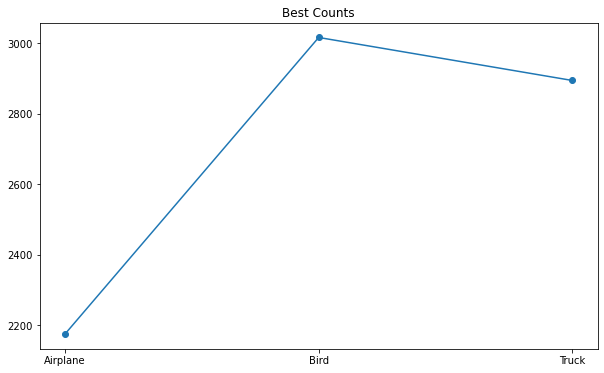

In [38]:
plt.figure(figsize=(10,6))
plt.plot(['Airplane','Bird','Truck'],max_counts,'-o')
plt.title('Best Counts')

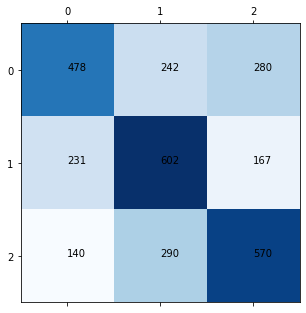

In [39]:
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))